<a href="https://colab.research.google.com/github/kkt86/quant-notebooks/blob/master/stocks_prediction_transformer_time_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stocks prediction with Transformer and Time Embeddings

Code taken from https://github.com/JanSchm/CapMarket/blob/master/bot_experiments/IBM_Transformer%2BTimeEmbedding.ipynb

In [3]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print(f"Tensorflow version: {tf.__version__}")

import matplotlib.pyplot as plt
plt.style.use("seaborn")

import warnings
warnings.filterwarnings("ignore")

Tensorflow version: 2.2.0


### Hyperparameters

In [4]:
batch_size = 32
seq_len = 128

d_k = 256
d_v = 256
n_heads = 12
ff_dim = 256

## Download historical data

In [8]:
!pip install yfinance yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.5-cp36-none-any.whl size=15195 sha256=0aef979c99e47b744e055226f72bf2f3c5c2b495798f31f294165a4c91b0093c
  Stored in directory: /root/.cache/pip/wheels/42/15/e7/240c5cdc8782b9479ba73404640a3be57bb4053a5c3edd6be5
Successfully built yahoofinancials


In [24]:
import yfinance as yf
from yahoofinancials import YahooFinancials

df_raw = yf.download("IBM")
df_raw.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


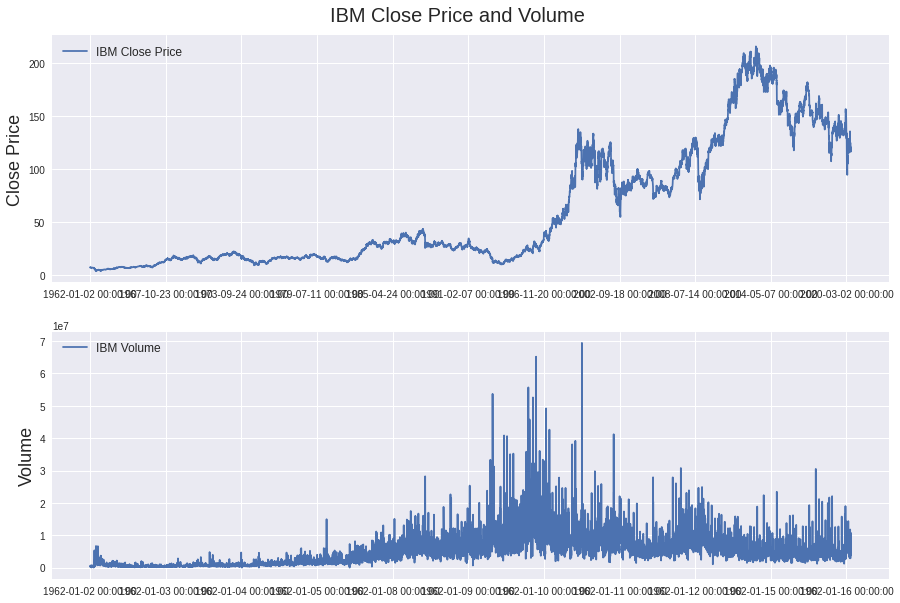

In [25]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("IBM Close Price and Volume", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(211)
ax1.plot(df_raw['Close'], label='IBM Close Price')
ax1.set_xticks(range(0, df_raw.shape[0], 1464))
ax1.set_xticklabels(df_raw['Date'].loc[::1464])
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

ax2 = fig.add_subplot(212)
ax2.plot(df_raw['Volume'], label='IBM Volume')
ax2.set_xticks(range(0, df_raw.shape[0], 1464))
ax2.set_xticklabels(df_raw['Date'].loc[:1464])
ax2.set_ylabel('Volume', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)

## Calculate normalized percentage change of all columns

In [33]:
df = df_raw.copy()

# calculate percentage changes
cols = ["Open", "High", "Low", "Close", "Volume"]
for col in cols:
  df[col] = df[col].pct_change()
df.dropna(how="any", axis=0, inplace=True)

# normalize price columns
cols = ["Open", "High", "Low", "Close"]
min_return = min(df[cols].min(axis=0))
max_return = max(df[cols].max(axis=0))
for col 

In [34]:
min_returns

-0.24242424242424243